<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/adm0/pillar1_processing_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [12]:
# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    first_two_words = '_'.join(filename_only.split('_')[:2])
    print(f"{first_two_words}: {df['child_population_exposed'].sum()}")


sand_dust: 130334590.66271248
air_pollution: 2307886442.9048467
vectorborne_malariapv: 626248547.7136718
vectorborne_malariapf: 704380018.7378261
extreme_heat: 1137296046.6513243
heatwave_frequency: 1076606771.2777357
river_flood: 350121550.311965
fire_FRP: 87807140.66960862
tropical_storm: 663602390.5887096
heatwave_severity: 328008468.89464784
drought_spi: 118223647.52046552
heatwave_duration: 1071098554.8669024
coastal_flood: 33325334.13157253
drought_spei: 202504415.6842643
fire_frequency: 141624660.58114526
agricultural_drought: 1356007789.3628657


Hazard data normalization test with plots

In [13]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [14]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

processed : sand_dust min: 0.1 max: 7.20596813310498
sand_dust: Log Transformation and Scaling - skew=-0.228, kurtosis=-1.212
IQR processed : sand_dust min: -7.519894681239741 max: 12.7998244687329


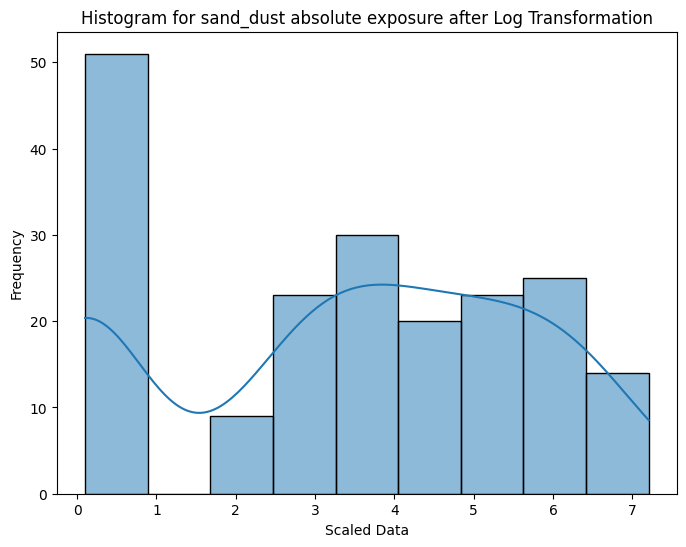

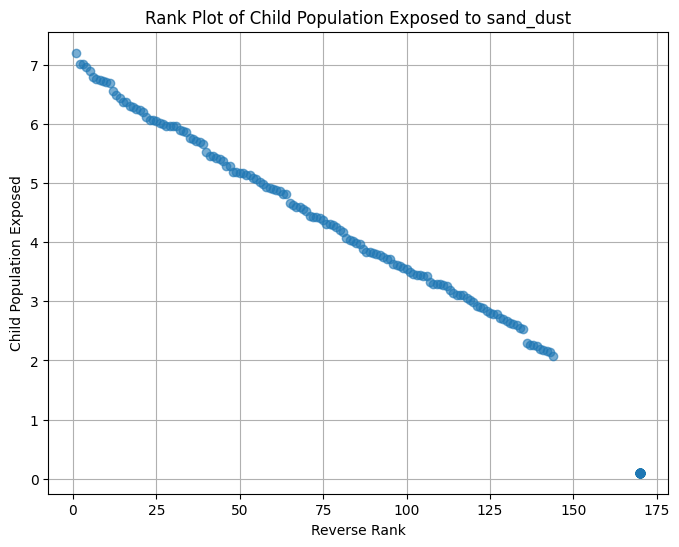

processed : air_pollution min: 2.2581055713750446 max: 8.4330765166382
air_pollution: Log Transformation and Scaling - skew=-0.979, kurtosis=1.156
IQR processed : air_pollution min: 3.767809991778634 max: 8.919140408641113


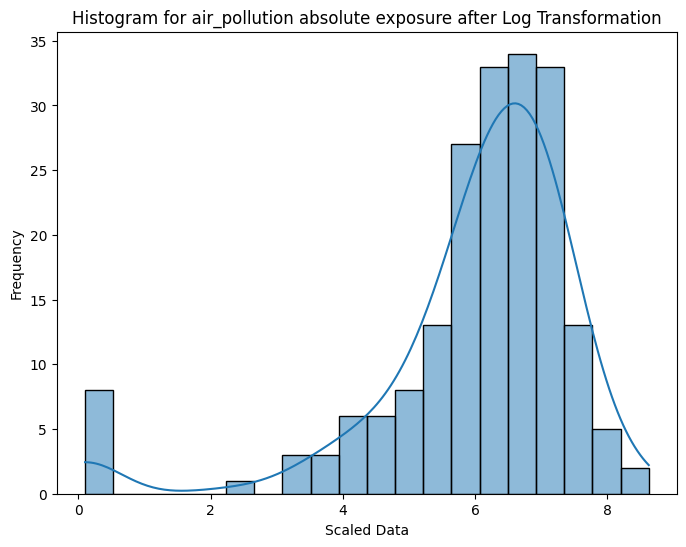

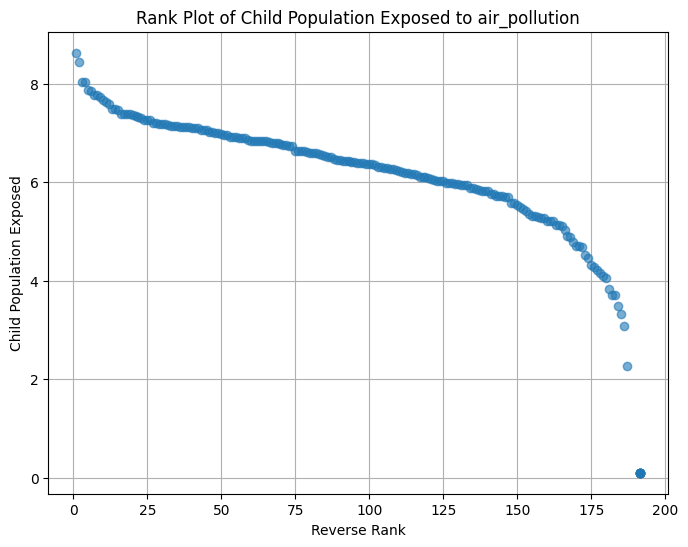

processed : vectorborne_malariapv min: 0.1 max: 8.523170624739743
vectorborne_malariapv: Log Transformation and Scaling - skew=1.321, kurtosis=0.045
IQR processed : vectorborne_malariapv min: -4.125483753240393 max: 7.142472922067321


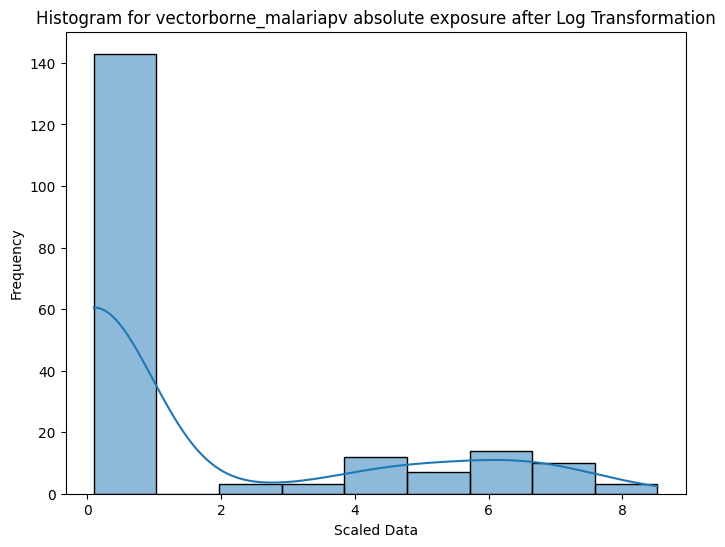

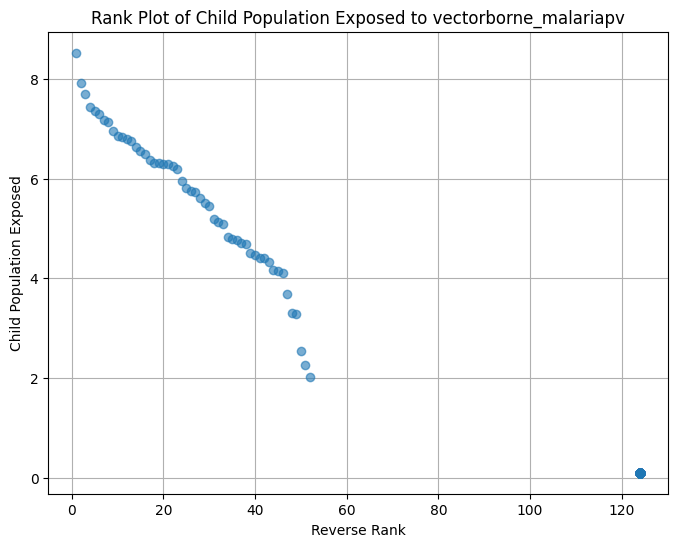

processed : vectorborne_malariapf min: 0.1 max: 8.043459123889761
vectorborne_malariapf: Log Transformation and Scaling - skew=0.481, kurtosis=-1.587
IQR processed : vectorborne_malariapf min: -8.70044013118814 max: 14.767400218646898


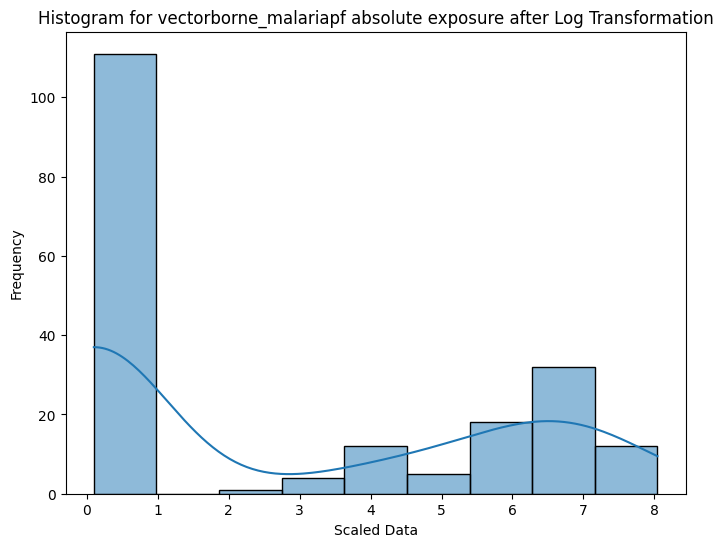

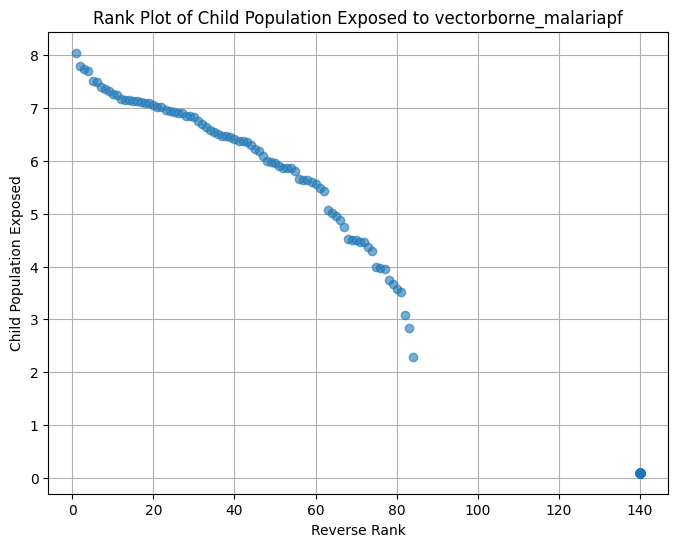

processed : extreme_heat min: 0.1 max: 8.594819460370596
extreme_heat: Log Transformation and Scaling - skew=-0.151, kurtosis=-1.789
IQR processed : extreme_heat min: -9.354042770816964 max: 15.856737951361605


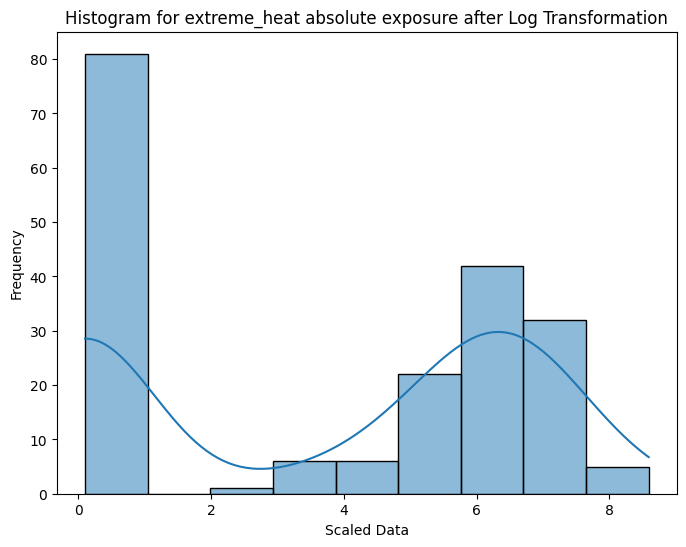

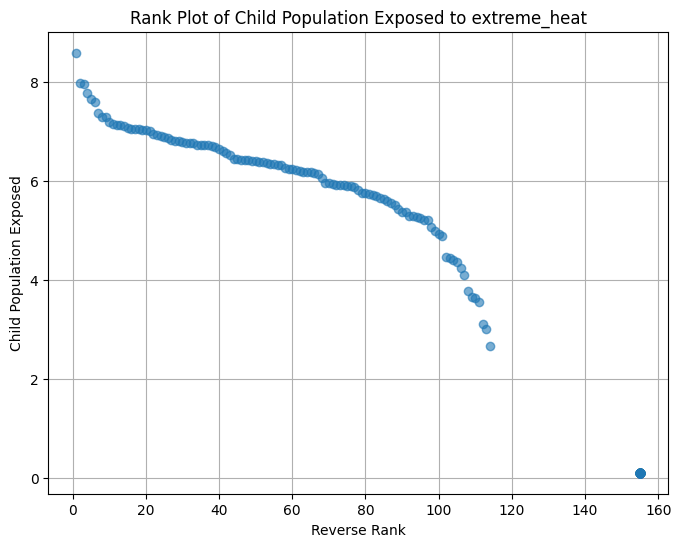

processed : heatwave_frequency min: 2.0401522524456706 max: 7.829064124264655
heatwave_frequency: Log Transformation and Scaling - skew=-1.032, kurtosis=1.357
IQR processed : heatwave_frequency min: 2.9910390702491907 max: 9.075190532439173


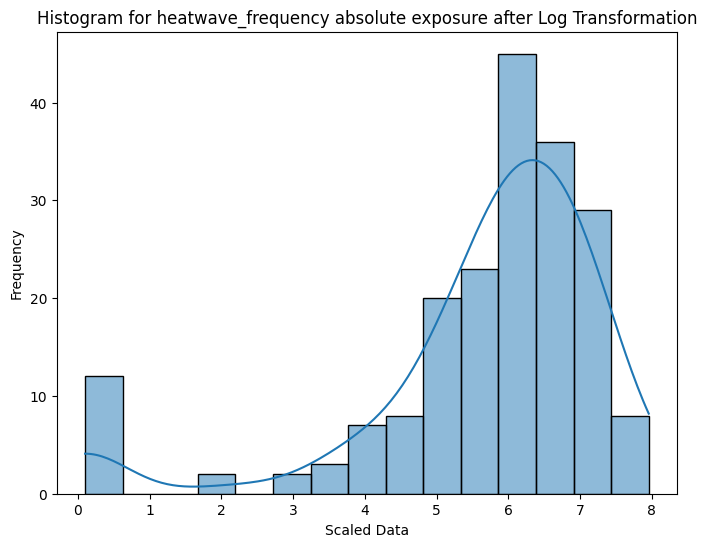

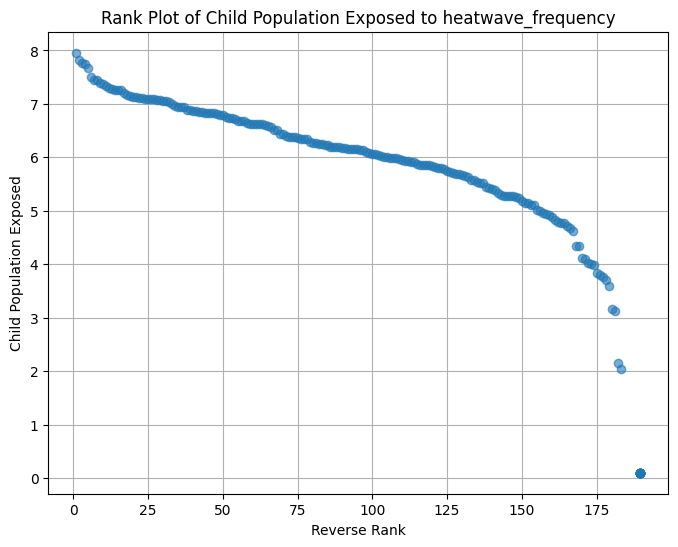

processed : river_flood min: 0.1 max: 7.874513200097062
river_flood: Log Transformation and Scaling - skew=-1.080, kurtosis=0.011
IQR processed : river_flood min: 1.4941077340564024 max: 8.274804348915737


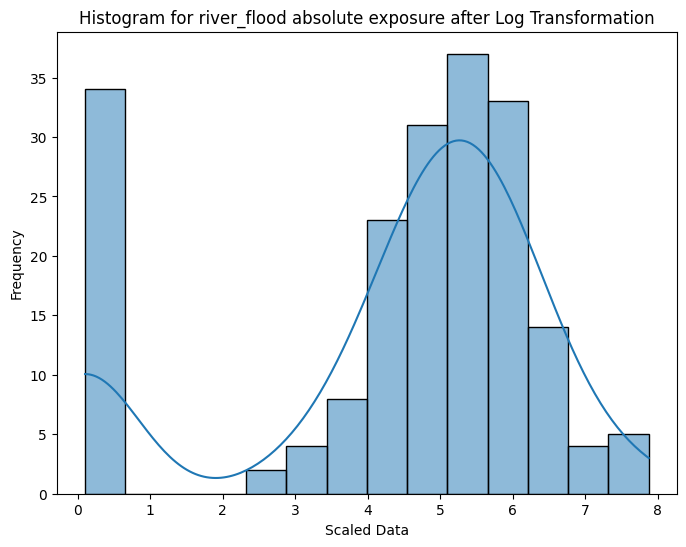

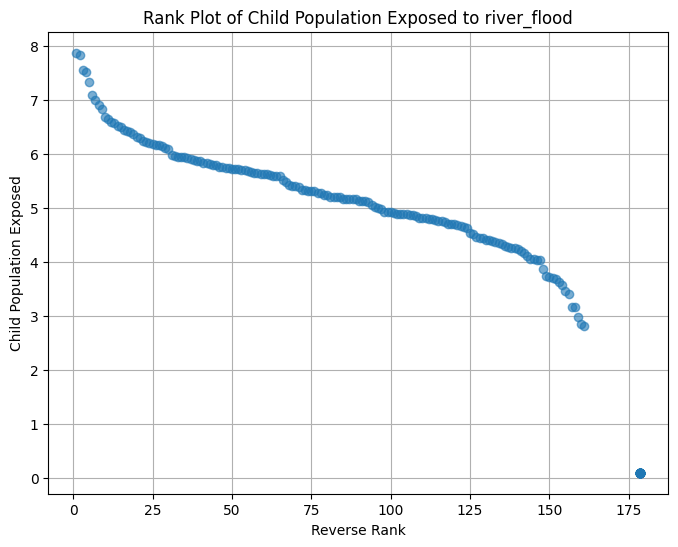

processed : fire_FRP min: 0.1 max: 6.877535295558921
fire_FRP: Log Transformation and Scaling - skew=-1.257, kurtosis=0.411
IQR processed : fire_FRP min: 1.2259418587313458 max: 8.246637360302469


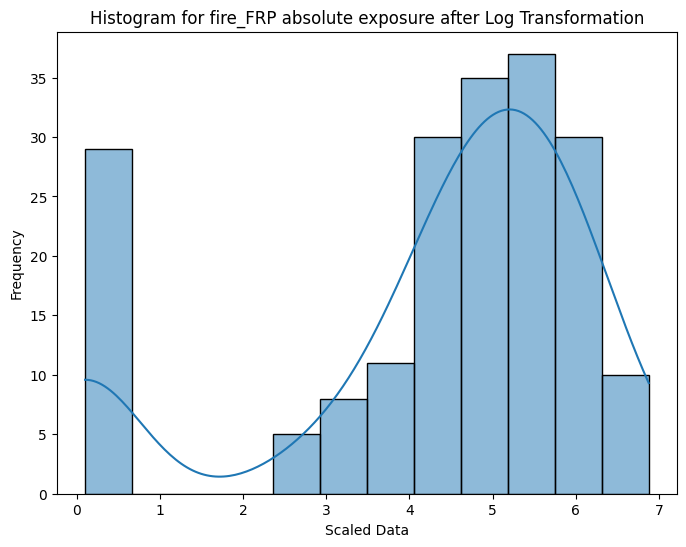

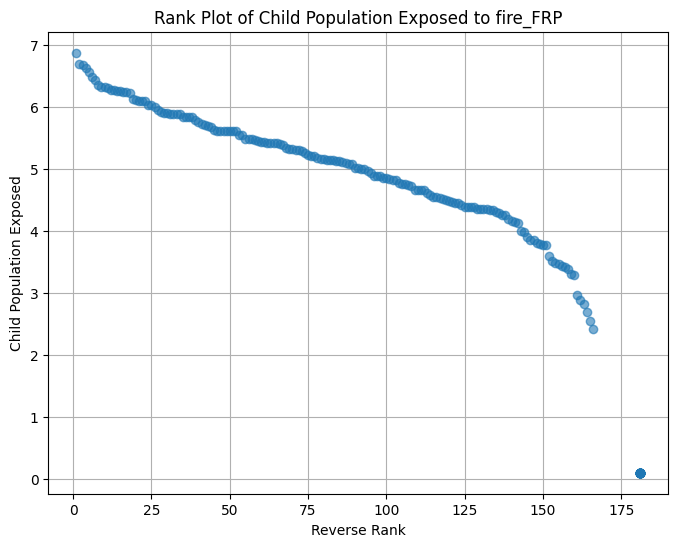

processed : tropical_storm min: 0.1 max: 8.194577491138853
tropical_storm: Log Transformation and Scaling - skew=0.640, kurtosis=-1.401
IQR processed : tropical_storm min: -8.06977278034623 max: 13.716287967243716


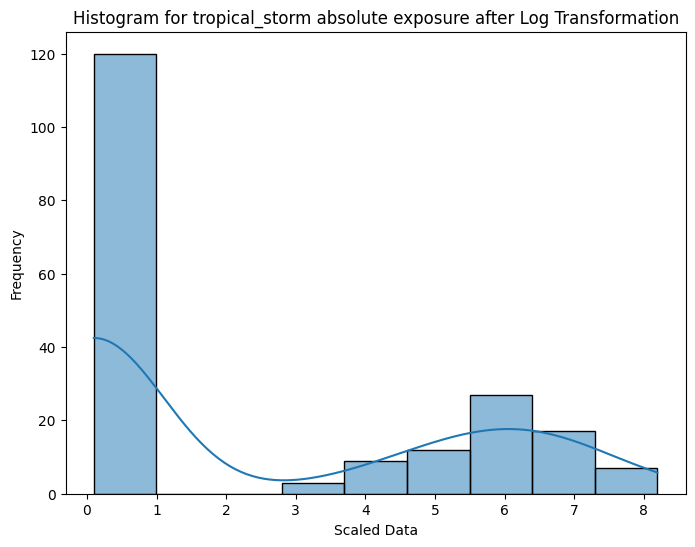

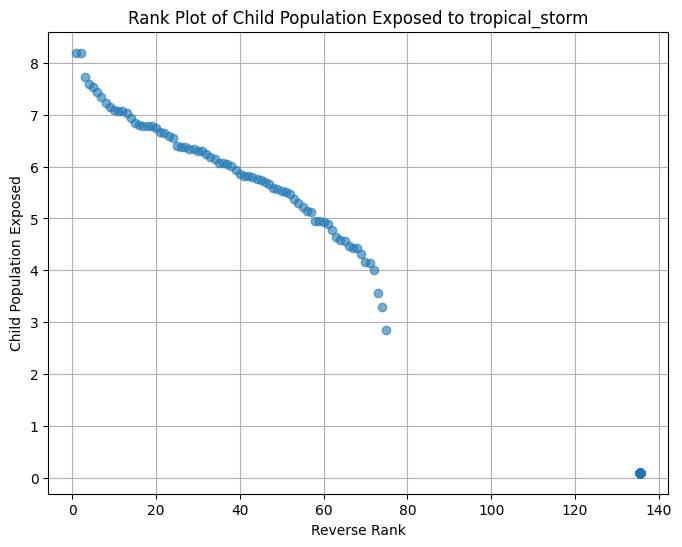

processed : heatwave_severity min: 0.1 max: 8.03495277197151
heatwave_severity: Log Transformation and Scaling - skew=0.379, kurtosis=-1.612
IQR processed : heatwave_severity min: -8.273388511305809 max: 14.055647518843013


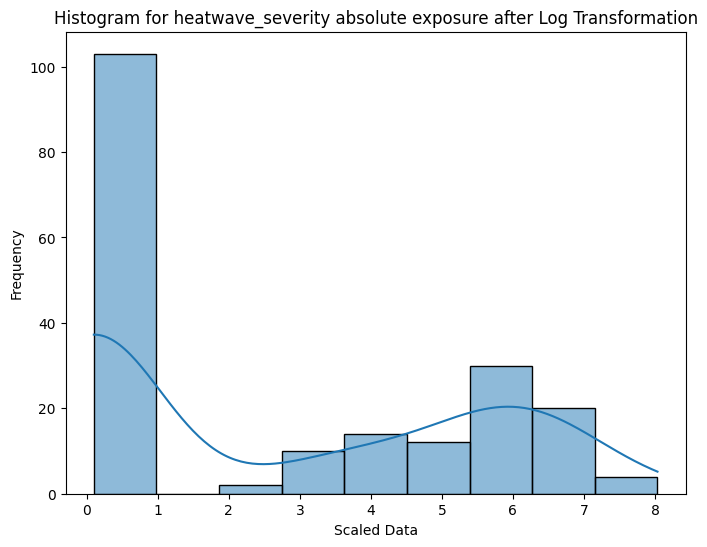

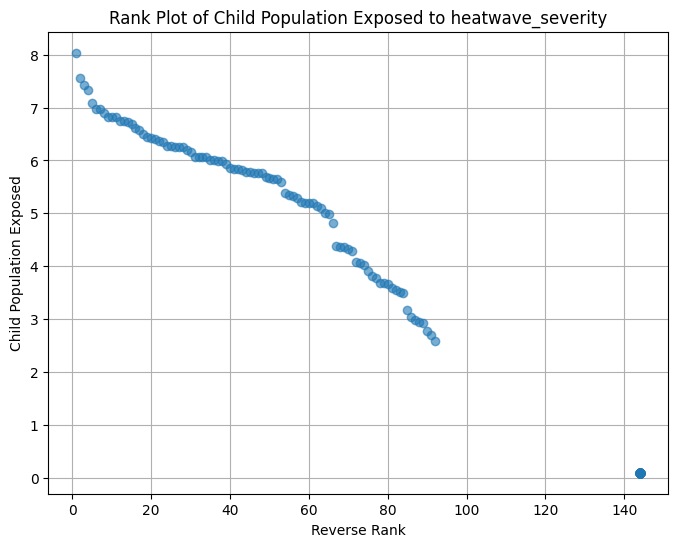

processed : drought_spi min: 0.1 max: 7.371861566519392
drought_spi: Log Transformation and Scaling - skew=-0.286, kurtosis=-1.184
IQR processed : drought_spi min: -7.026682929863771 max: 11.977804883106284


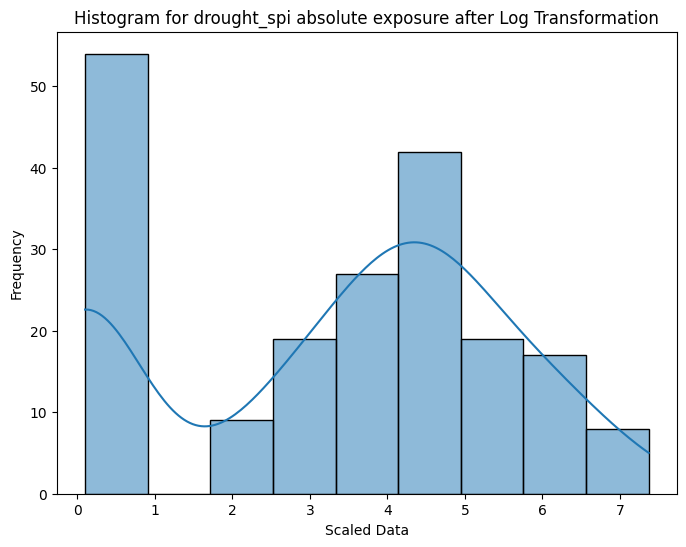

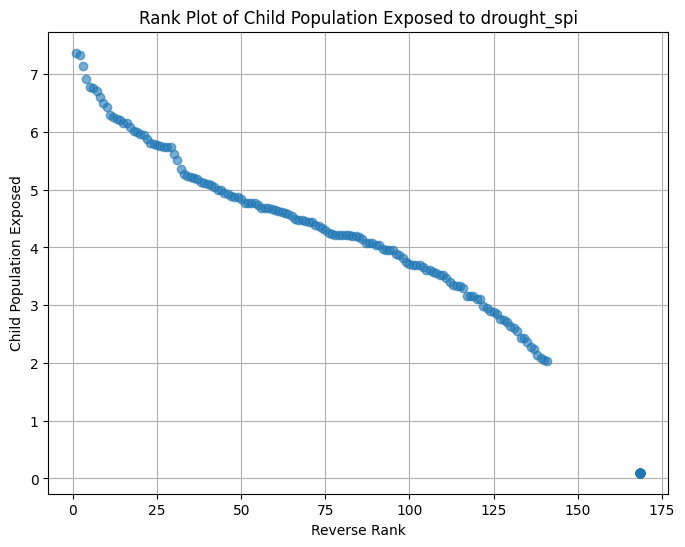

processed : heatwave_duration min: 0.1 max: 8.016308164342078
heatwave_duration: Log Transformation and Scaling - skew=-1.784, kurtosis=3.186
IQR processed : heatwave_duration min: 2.6598451218002754 max: 9.267806571244096


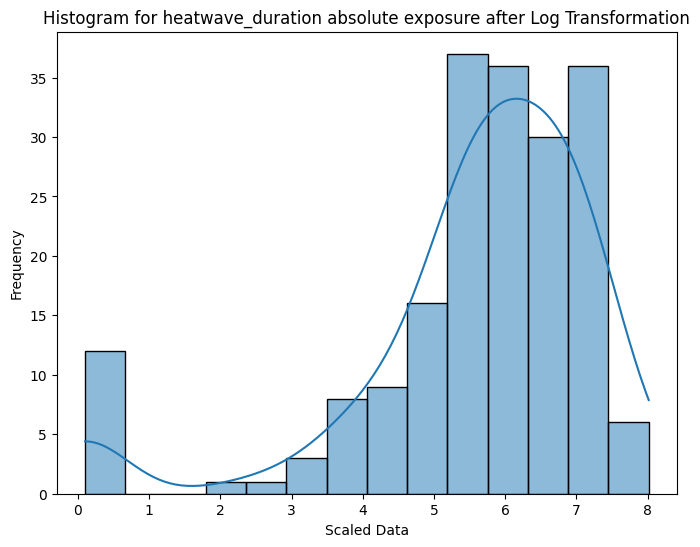

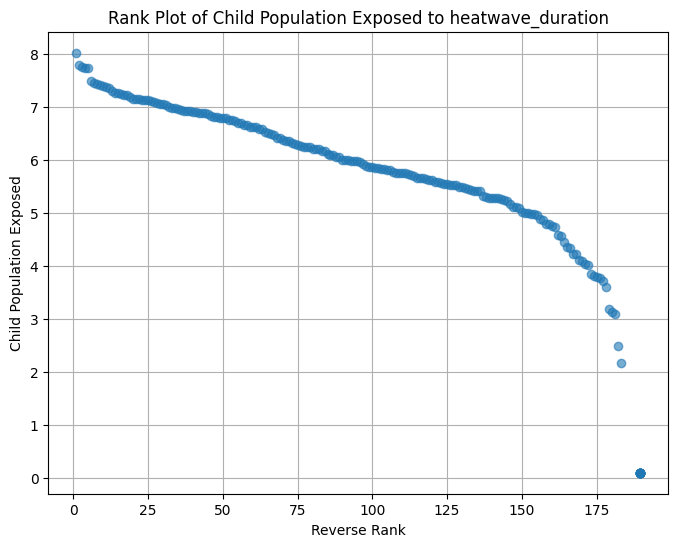

processed : coastal_flood min: 0.1 max: 7.131548303845231
coastal_flood: Log Transformation and Scaling - skew=-0.115, kurtosis=-1.281
IQR processed : coastal_flood min: -6.001748532083953 max: 10.269580886806587


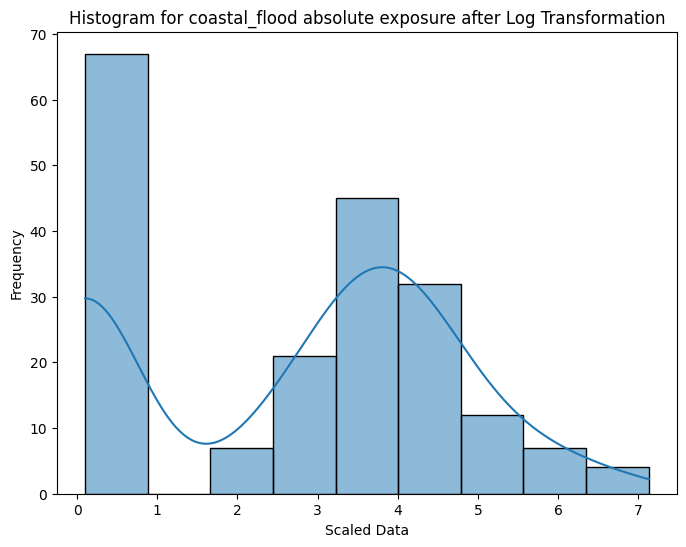

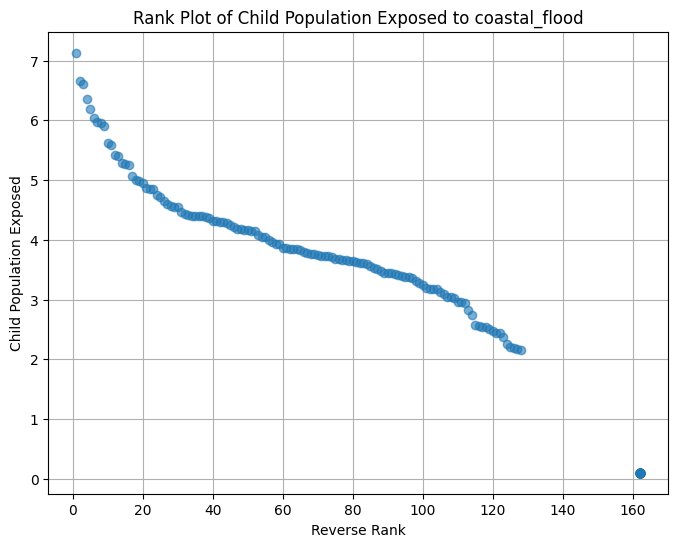

processed : drought_spei min: 0.1 max: 7.554834832953927
drought_spei: Log Transformation and Scaling - skew=-0.699, kurtosis=-0.639
IQR processed : drought_spei min: -0.8808485251934943 max: 9.324827321755057


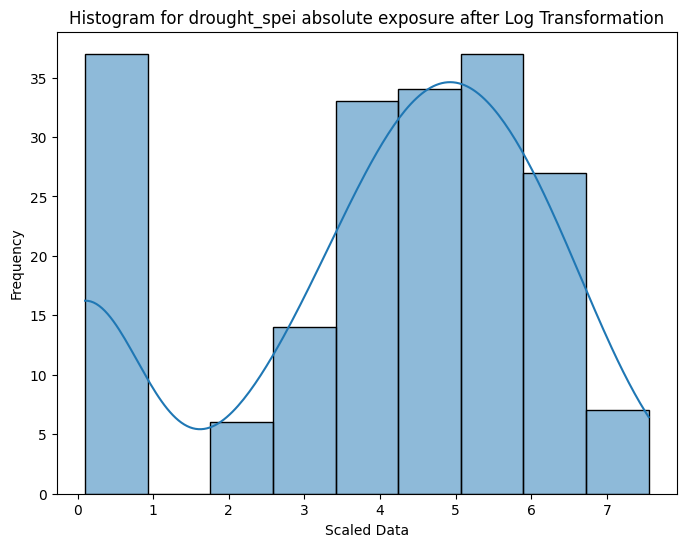

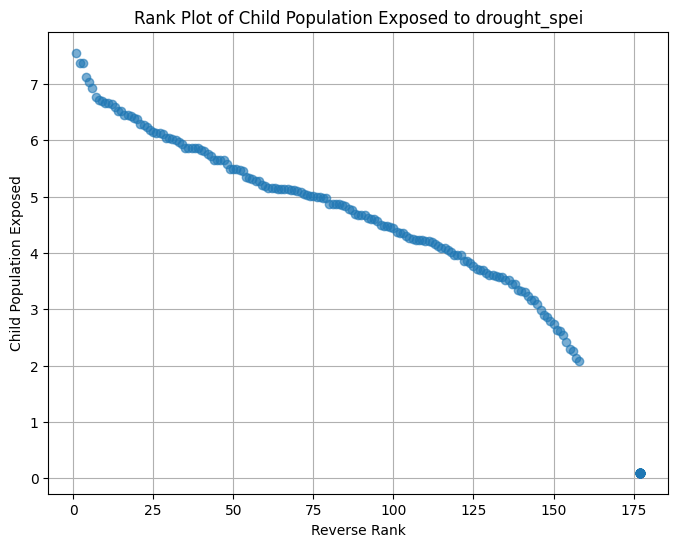

processed : fire_frequency min: 0.1 max: 7.350277241206102
fire_frequency: Log Transformation and Scaling - skew=-0.883, kurtosis=-0.189
IQR processed : fire_frequency min: -0.3481823019206307 max: 9.23552438279847


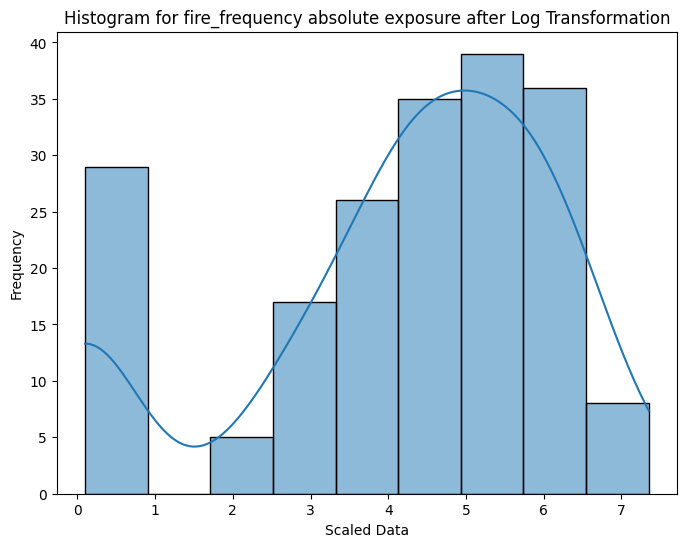

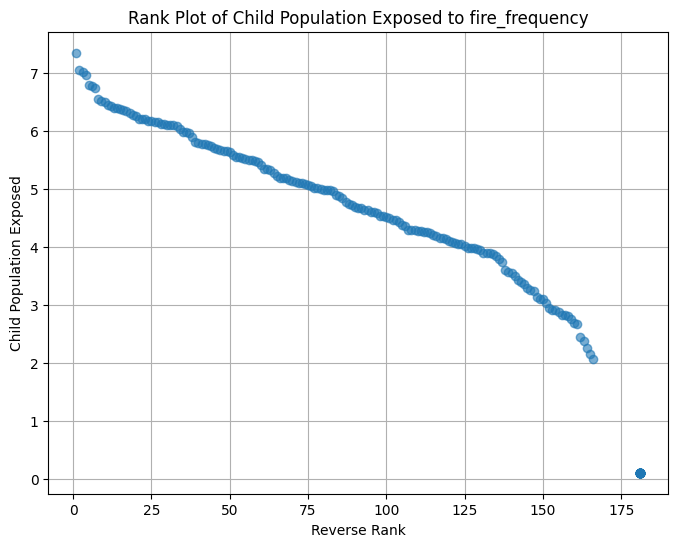

processed : agricultural_drought min: 0.1 max: 8.570508067650563
agricultural_drought: Log Transformation and Scaling - skew=-1.547, kurtosis=1.434
IQR processed : agricultural_drought min: 2.3835565494460784 max: 9.21128333023996


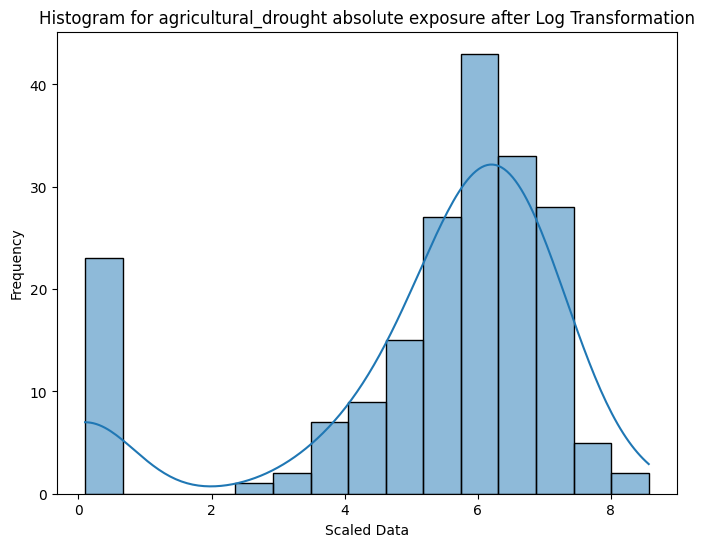

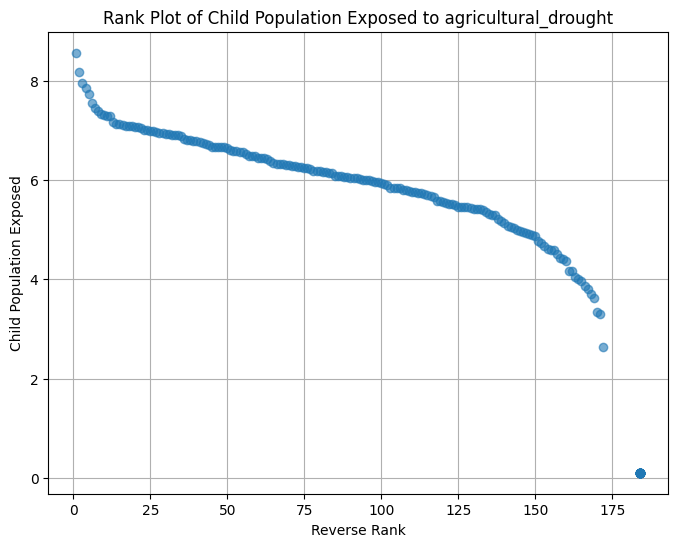

In [15]:

# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'iso3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['iso3', 'child_population_exposed']].dropna()

    # Apply iterative trimming
    # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
    df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
    with np.errstate(divide='ignore'):
      df['child_population_exposed'] = np.where(
          df['child_population_exposed'] > 100,
          np.log10(df['child_population_exposed']),
          0.1
      )
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

    print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
    current_skew = skew(trimmed_values)
    current_kurtosis = kurtosis(trimmed_values)
    print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['child_population_exposed'], kde=True)
    plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()

    # Compute ranks in reverse order
    df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()



0.0
79.39738384944346
Processed: sand_dust | Min: 0.011051828859527227 | Max: 12.451761104018493
sand_dust: Log Transformation - skew=1.998, kurtosis=3.216
IQR processed : sand_dust min: -226775.46853819757 max: 378209.294378359


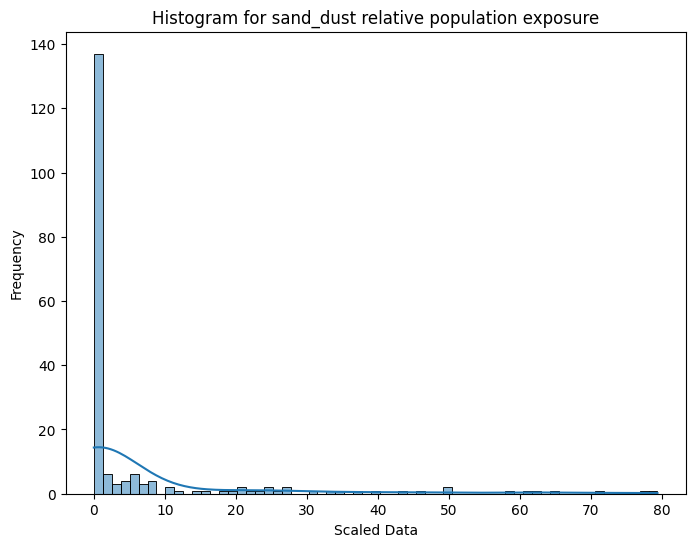

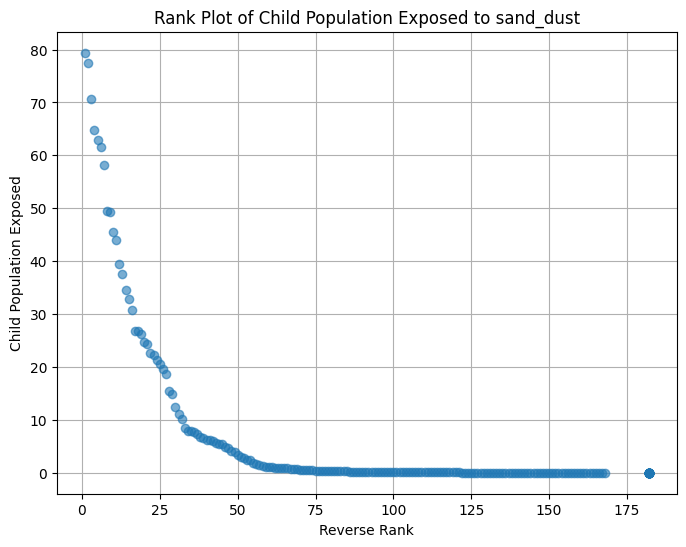

0.0
100.0
Processed: air_pollution | Min: 54.15166591523464 | Max: 99.96516407899644
air_pollution: Log Transformation - skew=-1.994, kurtosis=3.378
IQR processed : air_pollution min: -13320544.413277982 max: 23536201.45834993


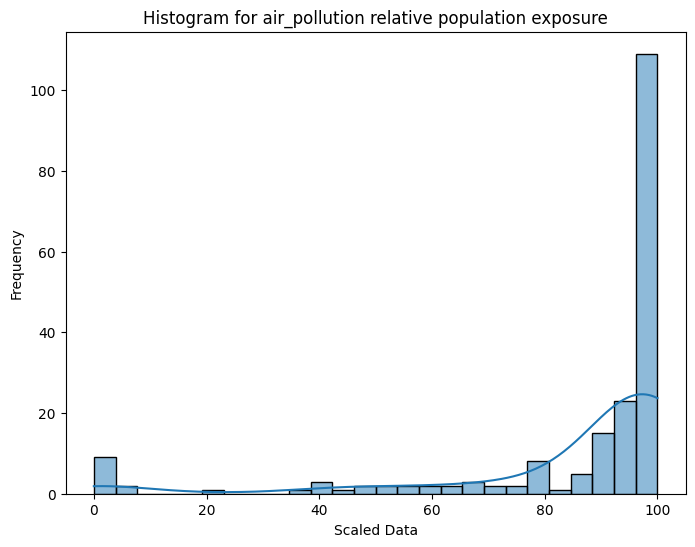

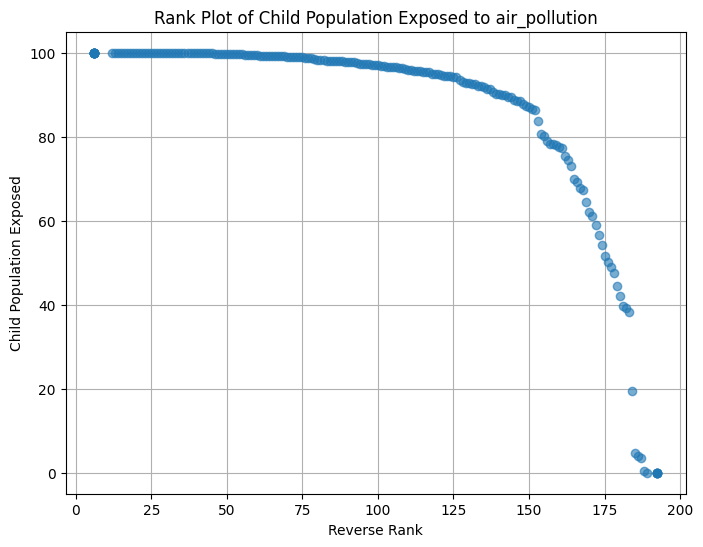

0.0
99.99443008609865
Processed: vectorborne_malariapv | Min: 0.00028292522391126643 | Max: 99.88643738347943
vectorborne_malariapv: Log Transformation - skew=0.604, kurtosis=-1.345
IQR processed : vectorborne_malariapv min: -1730.8104388385243 max: 2884.6840647308736


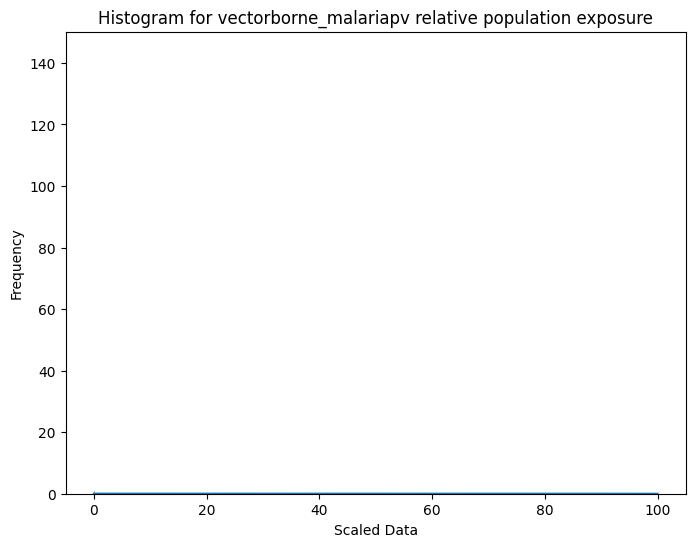

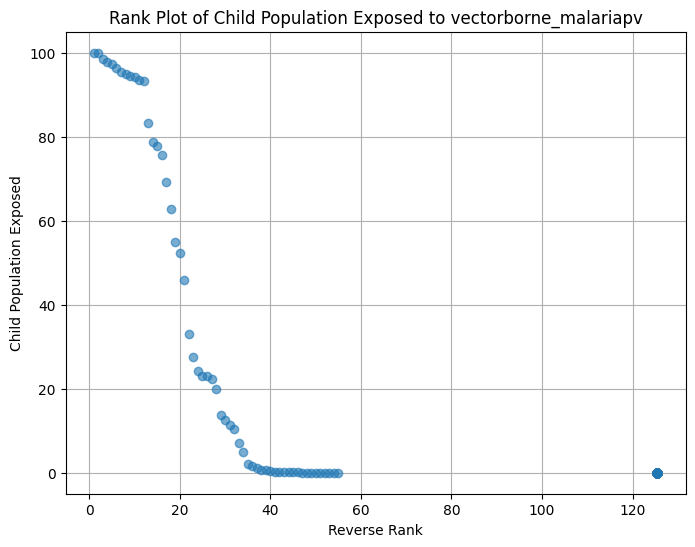

0.0
100.00000000000004
Processed: vectorborne_malariapf | Min: 0.0 | Max: 100.00000000000004
vectorborne_malariapf: Log Transformation - skew=1.167, kurtosis=-0.526
IQR processed : vectorborne_malariapf min: -1390396.3512911778 max: 2317327.2521519633


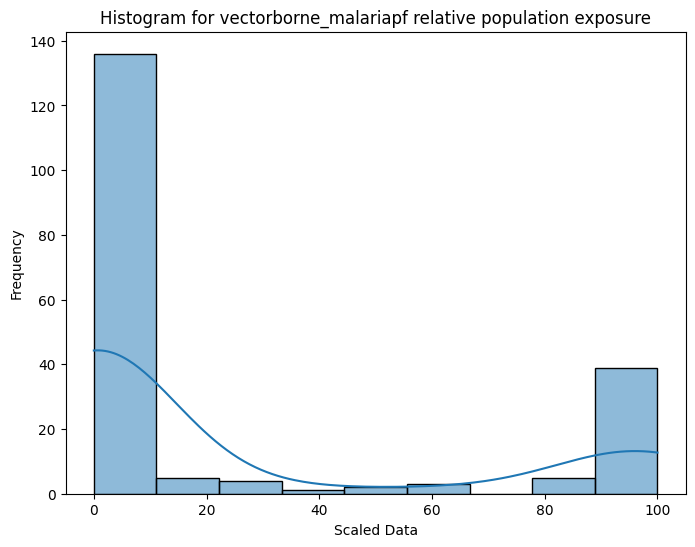

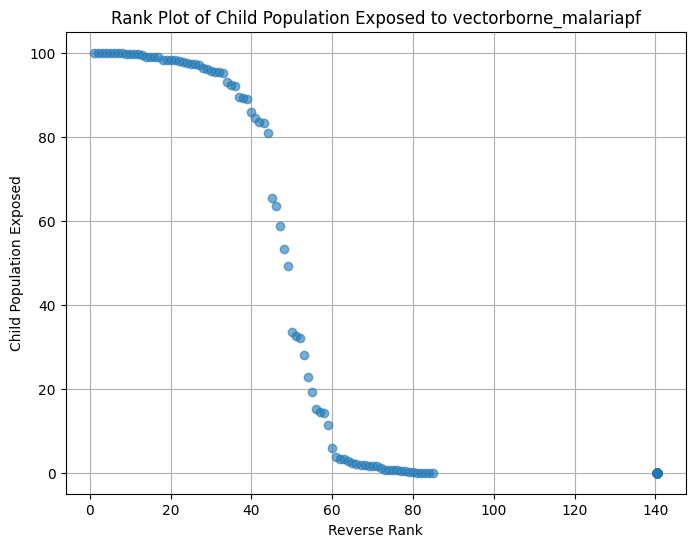

0.0
100.00000000000003
Processed: extreme_heat | Min: 0.0 | Max: 100.00000000000003
extreme_heat: Log Transformation - skew=1.094, kurtosis=-0.331
IQR processed : extreme_heat min: -3791339.591394595 max: 6318899.318990991


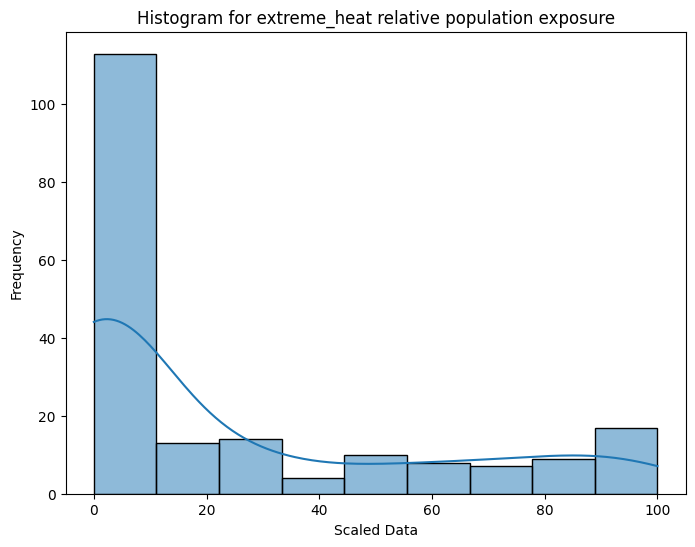

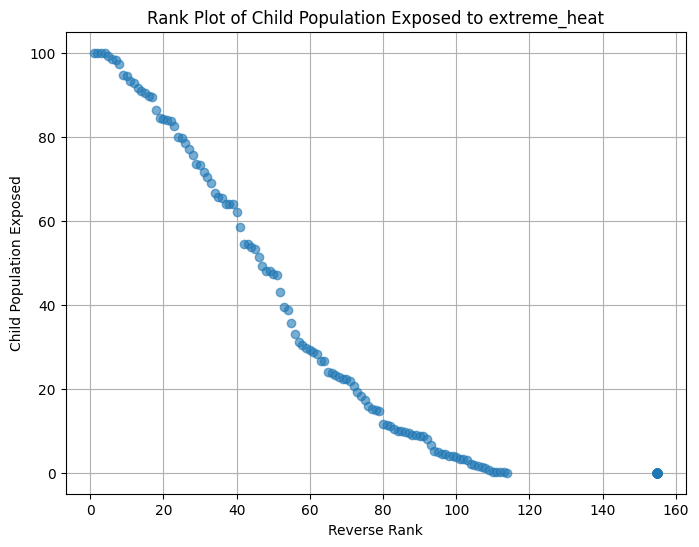

0.0
100.0
Processed: heatwave_frequency | Min: 0.0 | Max: 100.0
heatwave_frequency: Log Transformation - skew=-0.598, kurtosis=-1.079
IQR processed : heatwave_frequency min: -8858597.965438556 max: 15263880.974937646


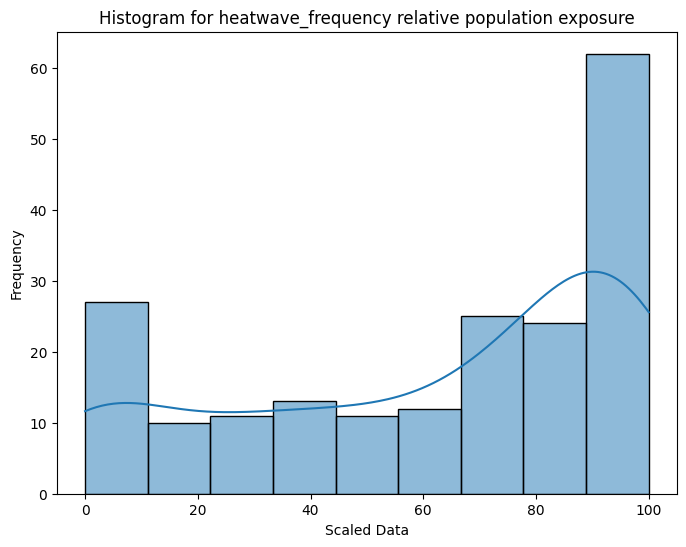

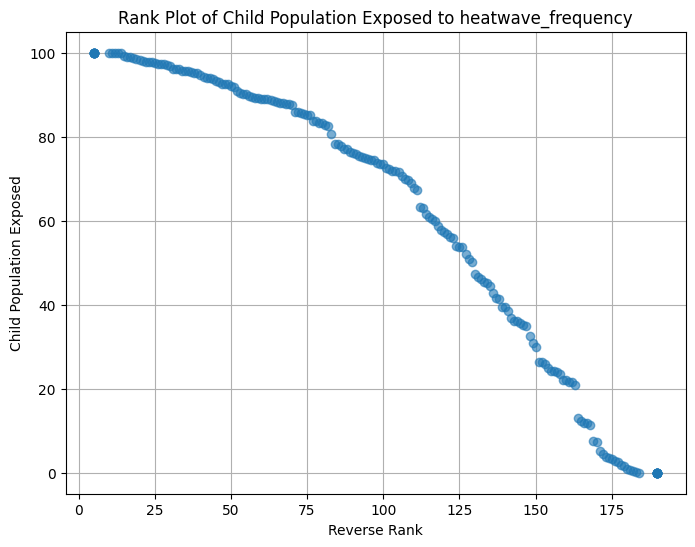

0.0
75.90565373748571
Processed: river_flood | Min: 0.3014573236221219 | Max: 33.229055543494404
river_flood: Log Transformation - skew=1.711, kurtosis=3.189
IQR processed : river_flood min: -782132.0016863608 max: 1332583.5082209513


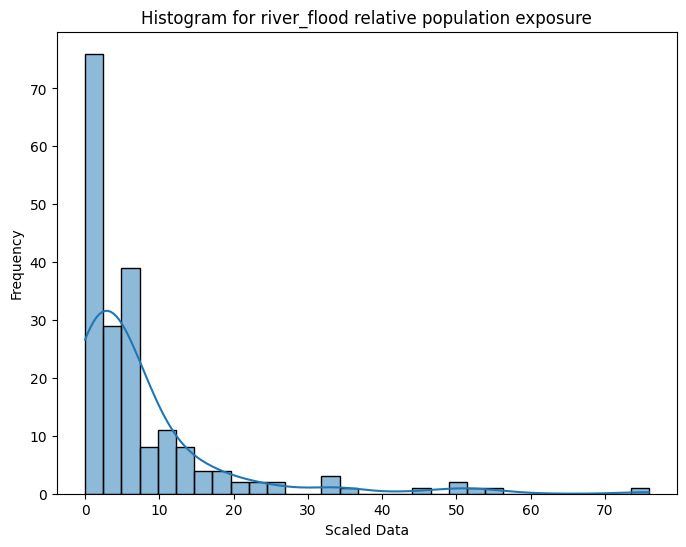

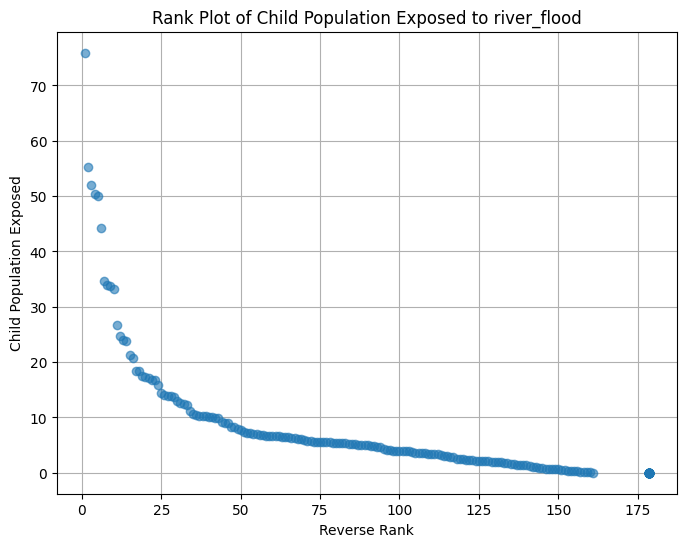

0.0
49.54494827725101
Processed: fire_FRP | Min: 0.1742059634439557 | Max: 22.031918463797105
fire_FRP: Log Transformation - skew=1.758, kurtosis=3.444
IQR processed : fire_FRP min: -598492.5796555482 max: 1016748.4251383475


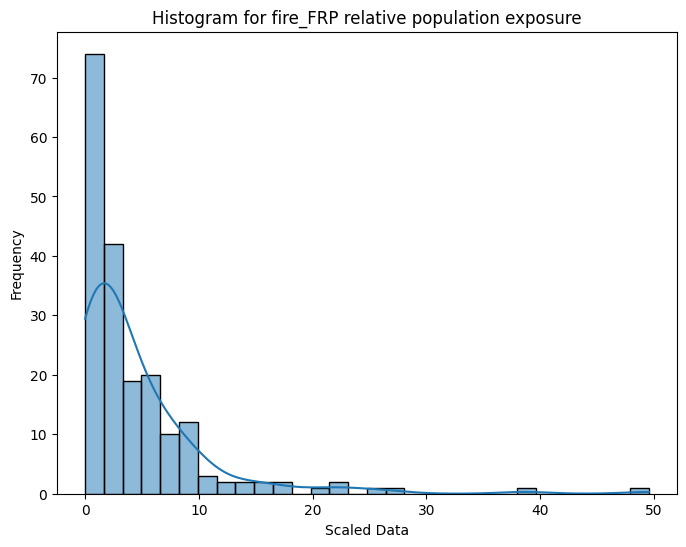

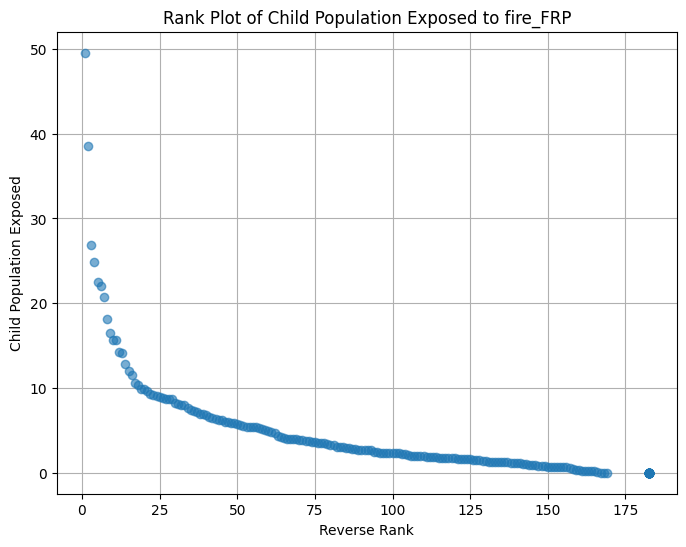

0.0
100.00000000000003
Processed: tropical_storm | Min: 0.0 | Max: 100.00000000000003
tropical_storm: Log Transformation - skew=1.069, kurtosis=-0.701
IQR processed : tropical_storm min: -528732.8096696726 max: 881221.3494494543


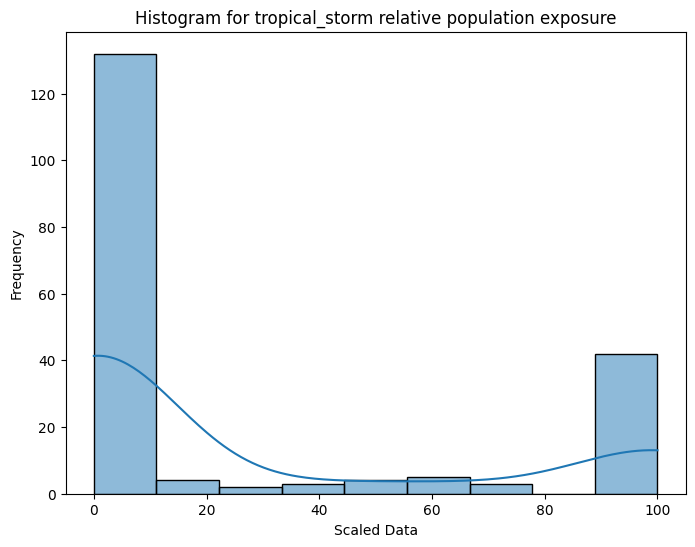

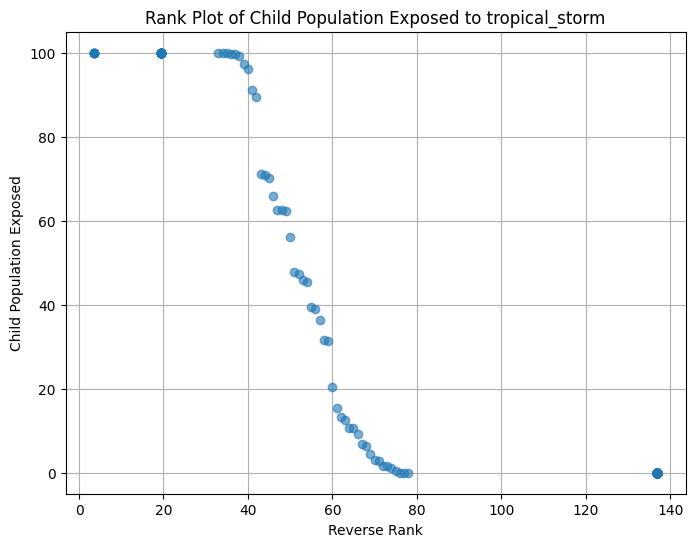

0.0
99.99980625792502
Processed: heatwave_severity | Min: 0.0 | Max: 99.99980625792502
heatwave_severity: Log Transformation - skew=1.753, kurtosis=1.669
IQR processed : heatwave_severity min: -722009.0067456237 max: 1203348.3445760394


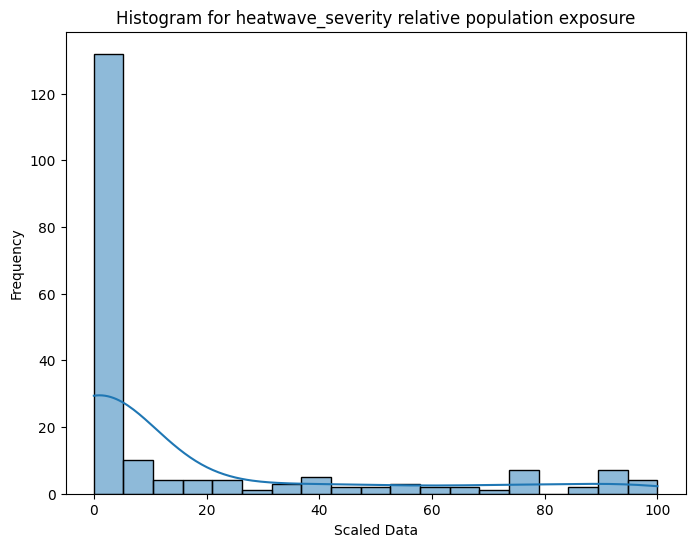

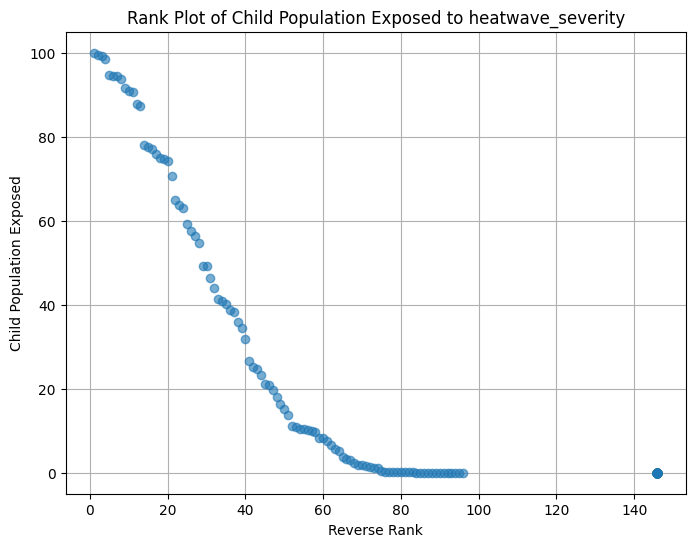

0.0
100.00000000000003
Processed: drought_spi | Min: 0.03974009603751762 | Max: 16.269704304767075
drought_spi: Log Transformation - skew=1.943, kurtosis=3.109
IQR processed : drought_spi min: -106511.84009895839 max: 177556.45482104915


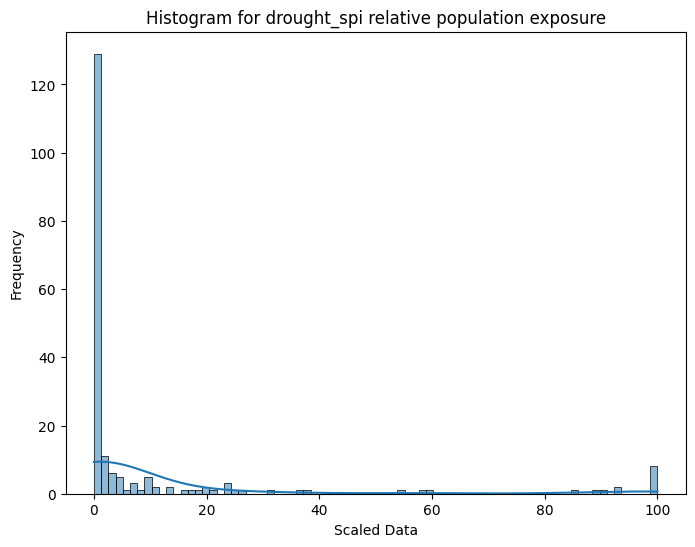

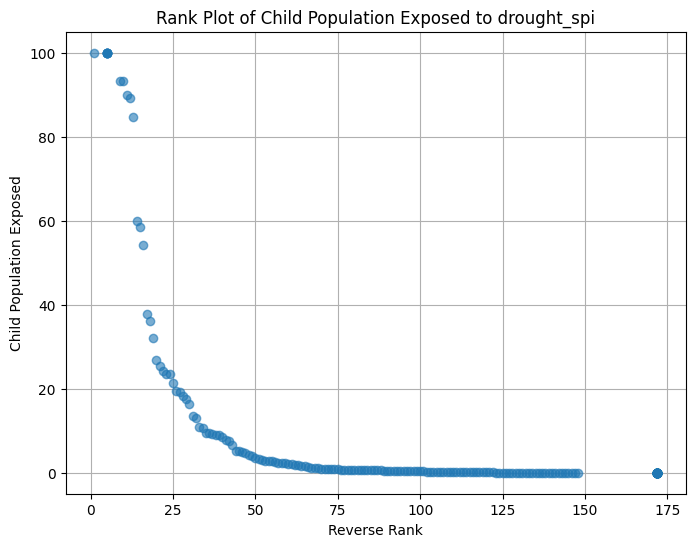

0.0
100.00000000000004
Processed: heatwave_duration | Min: 0.0 | Max: 100.00000000000004
heatwave_duration: Log Transformation - skew=-0.333, kurtosis=-1.395
IQR processed : heatwave_duration min: -8900938.361225482 max: 15202022.969908595


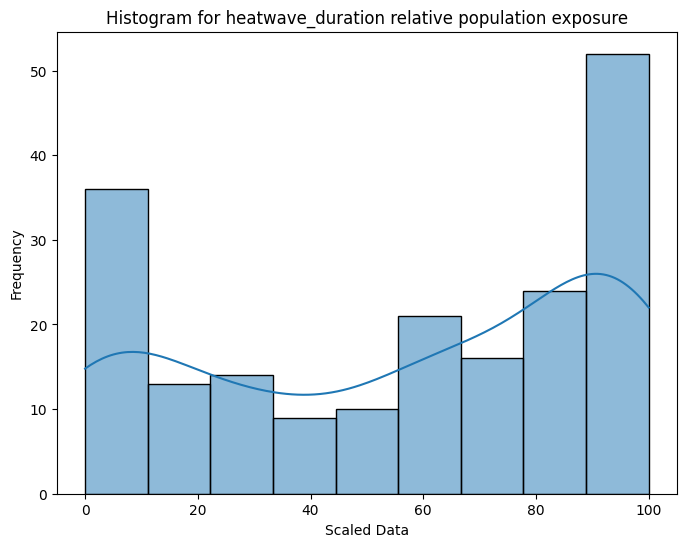

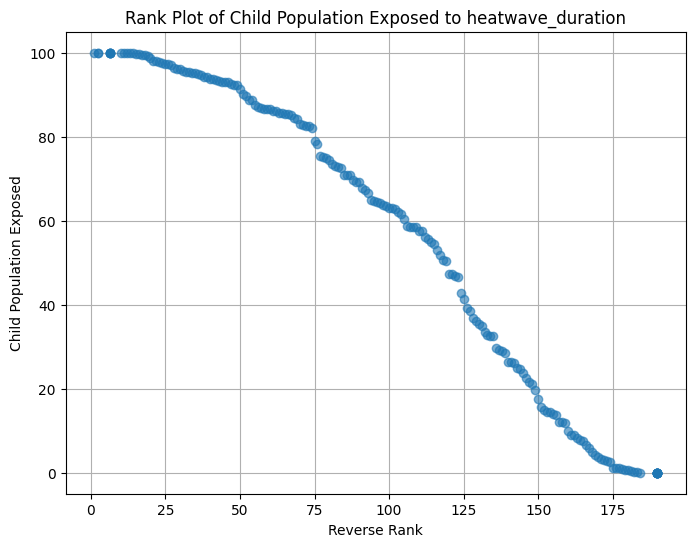

0.0
46.5028426471586
Processed: coastal_flood | Min: 0.024376669984816864 | Max: 2.5092397029504223
coastal_flood: Log Transformation - skew=1.999, kurtosis=3.245
IQR processed : coastal_flood min: -22076.71863488191 max: 36794.53105813652


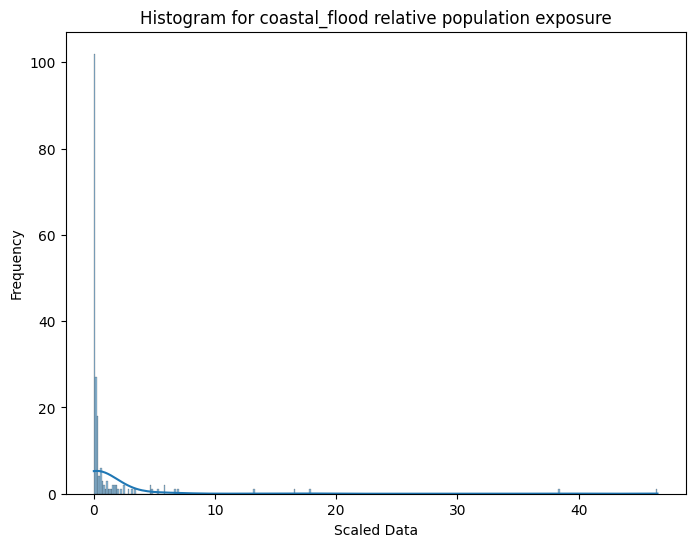

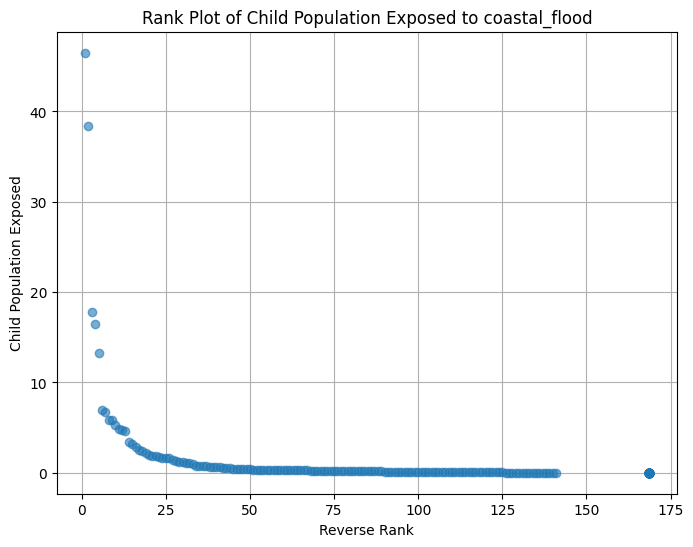

0.0
100.00000000000003
Processed: drought_spei | Min: 0.012181048084152147 | Max: 62.202072722703846
drought_spei: Log Transformation - skew=1.932, kurtosis=2.966
IQR processed : drought_spei min: -469617.591766024 max: 785066.3708271191


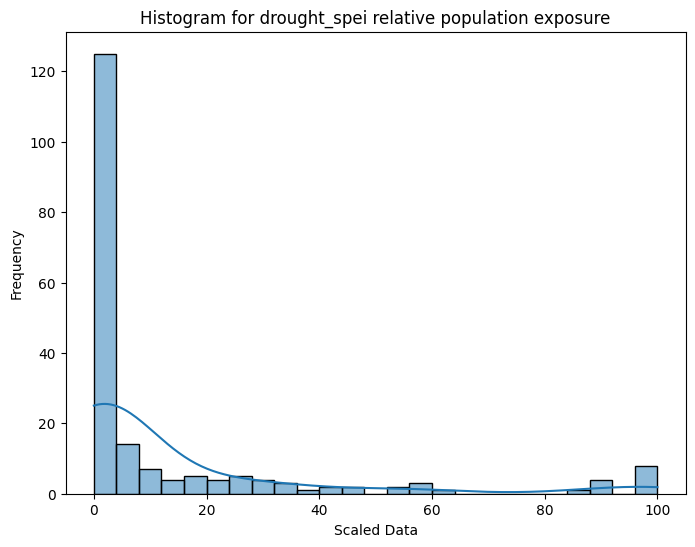

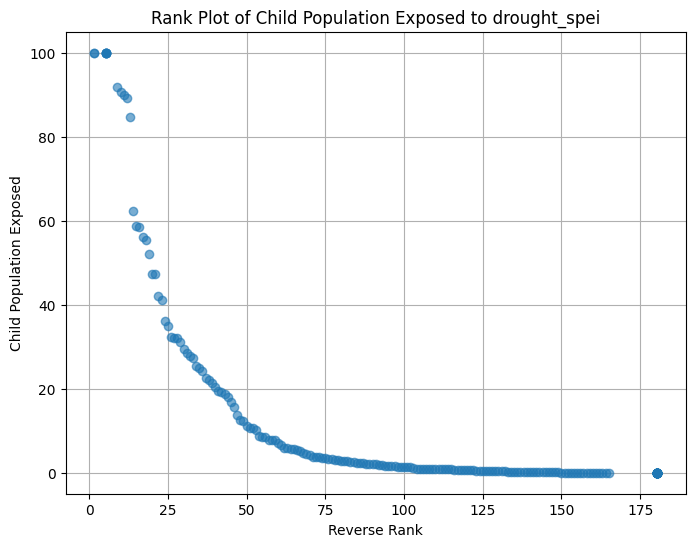

0.0
72.01886442294727
Processed: fire_frequency | Min: 0.07767389019634699 | Max: 27.602067422159244
fire_frequency: Log Transformation - skew=1.820, kurtosis=3.360
IQR processed : fire_frequency min: -653009.1616559477 max: 1093044.2000603965


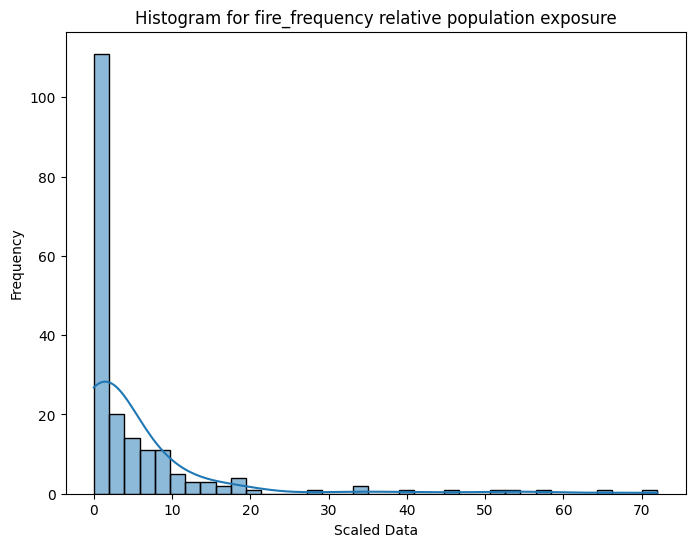

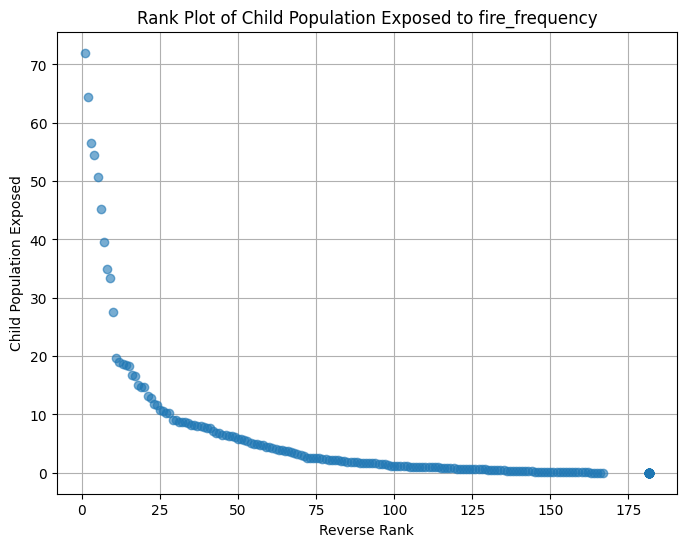

0.0
100.0
Processed: agricultural_drought | Min: 0.0 | Max: 100.0
agricultural_drought: Log Transformation - skew=0.123, kurtosis=-1.183
IQR processed : agricultural_drought min: -6495911.26358773 max: 11060971.255199794


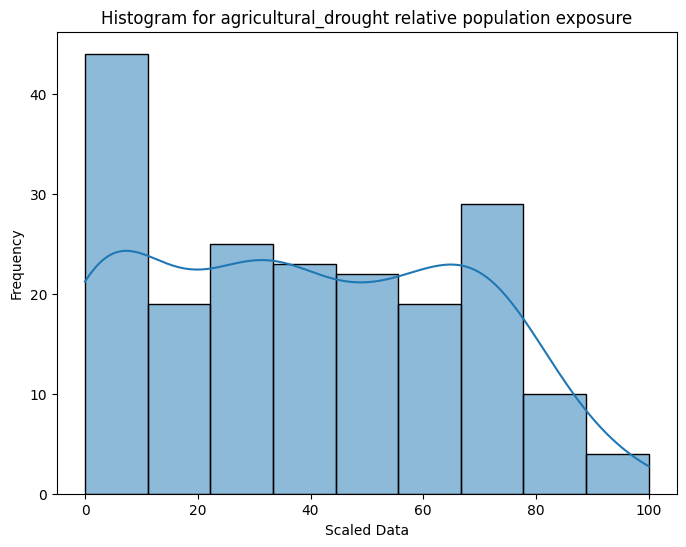

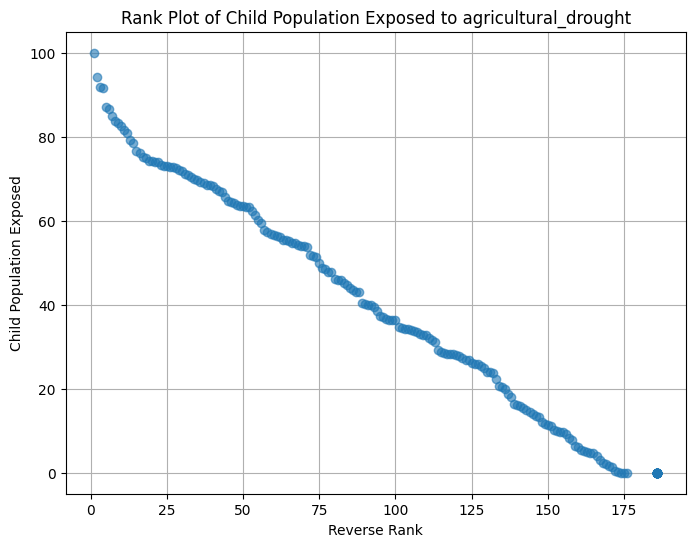

In [16]:

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'iso3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['iso3', 'child_population_exposed','child_population_total']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [17]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = "/content/drive/MyDrive/p1_exposure"

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:

    df = pd.read_csv(file)  # Read full file to check available columns
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {'iso3', 'adm0_name', 'child_population_exposed', 'child_population_total'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)
    #open min_max data file and use them to normalize the values
    # df_min_max = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/p1_min_max.csv')
    # min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'min'].values[0]
    # max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'max'].values[0]

    # clip to min max
    # df['absolute_exposure'] = np.clip(df['absolute_exposure'], min_trimmed, max_trimmed)
    # Calculate 5th and 95th percentiles
    lower_percentile = df['absolute_exposure'].quantile(0.05)
    upper_percentile = df['absolute_exposure'].quantile(0.95)

    # Clip values to within the percentile range
    df['absolute_exposure'] = np.clip(df['absolute_exposure'], lower_percentile, upper_percentile)


    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = 10 * (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    ### **Step 2: Relative Exposure Processing**

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        0
    )

    # #get min max values for relative exposures
    # min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'min'].values[0]
    # max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'max'].values[0]

    # # Normalize relative exposure
    # df['relative_exposure'] = np.clip(df['relative_exposure'], min_trimmed, max_trimmed)

    lower_percentile = df['relative_exposure'].quantile(0.05)
    upper_percentile = df['relative_exposure'].quantile(0.95)

    # Clip values to within the percentile range
    df['relative_exposure'] = np.clip(df['relative_exposure'], lower_percentile, upper_percentile)

    df['relative_value_normalized'] = 10 * (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    #If absolute value is zero, relative is also zero
    df.loc[df['absolute_value_normalized'] == 0, 'relative_value_normalized'] = 0
    df.loc[df['relative_value_normalized'] == 0, 'absolute_value_normalized'] = 0

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'relative_value_normalized': hazard_name + '_relative'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[['iso3', 'adm0_name',
                                  hazard_name + '_absolute',
                                  hazard_name + '_relative']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=['iso3', 'adm0_name'])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]

# Save merged exposure data
output_path = "/content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Merged exposure data saved to /content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv
